In [1]:
#Chapter 1 - Preliminaries 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import statsmodels as sm 

b'espanol'

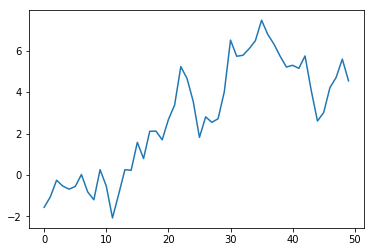

In [2]:
#Chapter 2 - Python Language Basics, Ipython, and Jupyter Notebooks
'''
%run -- execute the code in the specified file 
? -- before or after a variable will display some general information about the object 
?? -- also show the functions source code 
* -- show all names matching the wildcard expression 
%run -i -- give a access to variable already defined in the interactive IPython namespace.
%load -- import a script into a code cell 
%paste -- execute clipboard single block 
%pdb -- Automatically enter debugger after any exception 

"duck typing" -- not care about the type of an object but rather only whether it has certain methods or behavior
'''
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.plot(np.random.randn(50).cumsum())
val = "espanol"
val.encode('latin1')

In [3]:
#Chapter 3 - Built-in Data Structures,Functions,and Files
import bisect
c = [1,2,2,2,3,4,7]
bisect.bisect(c,2) #location where an element should be inserted
bisect.insort(c,5) # actually inserts the elements into that location
# biset module functions do not check whether the list is sorted, as
c  = [1,10,11,2,3]
bisect.insort(c,2)

pitchers = [('Nolan','Ryan'),('Roger', 'Clemens'),('Schilling','Curt')]
first_names, last_names = zip(*pitchers)
first_names

hash('string')

{1,2,3} == {3,2,1}

# filter out strings with length 2 or less and also convert them to uppercase 
strings = ['a', 'as', 'bat', 'car', 'dove', 'python']
[x.upper() for x in strings if len(x) > 2]

states = [' Alabama ', 'Georgia!', 'Georgia', 'georgia', 'FlOrIda',
          'south carolina##', 'West virginia?']
import re 

def clean_strings(strings):
    result = []
    for value in strings:
        value = value.strip()
        value = re.sub('[!#?]', '', value)
        value = value.title()
        result.append(value)
    return result 

clean_strings(states)
import sys 
sys.getdefaultencoding()

# utf-8 is a variable-length Unicode encoding

'utf-8'

CPU times: user 25 ms, sys: 16 ms, total: 41 ms
Wall time: 42.7 ms
CPU times: user 822 ms, sys: 206 ms, total: 1.03 s
Wall time: 1.04 s


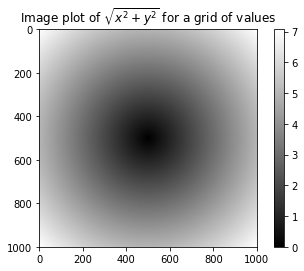

In [4]:
#Chapter 4 - NumPy Basics: Arrays and Vectorized Computation
import numpy as np 
my_arr = np.arange(1000000)
my_list = list(range(1000000))
# NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counter[arts and use significantly less memory]
%time for _ in range(10): my_arr2 = my_arr *2 
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

# Generate some random data 
data = np.random.randn(2, 3)
data * 10
data + data
data.shape
data.dtype

data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1.dtype

data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2.ndim
arr2.shape

# will return an array of all zeros, in some cases, it may return uninitialized "garbage" values
np.empty((2,3,2))

arr1 = np.array([1,2,3], dtype=np.float64)
arr2 = np.array([1,2,3], dtype=np.int32)
arr1.dtype

arr = np.array([1,2,3,4,5])
arr.dtype
float_arr = arr.astype(np.float64)
float_arr.dtype

arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(np.int)

numeric_strings = np.array(['1.25',  '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr * arr
arr - arr
1/arr
arr ** 0.5

arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

# yield boolean arrays 
arr2 > arr 

names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)

data[names == 'Bob']
data[~(names == 'Bob')]

mask = (names == 'Bob') | (names == 'Will')
data[mask]
data[data < 0] = 0
data

arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
    
arr[[4,3,0,6]]
arr[[-3, -5, -7]]

# Keep in mind that fancy indexing, unlike slicing copies the data into a new array.

arr = np.arange(15).reshape((3,5))
arr.T
np.dot(arr.T, arr)

points = np.arange(-5, 5, 0.01) # 1000 equally spaced points 
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs ** 2 + ys ** 2)

import matplotlib.pyplot as plt 
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result = np.where(cond, xarr, yarr)

arr = np.random.randn(4,4)
arr > 0
np.where(arr > 0, 2, -2)

arr = np.random.randn(5, 4)
arr.mean() # 中间值
np.mean(arr)
arr.sum()
arr.mean(axis=1) # compute mean across the columns 
arr.mean(axis=0)

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

# np.save and np.load are the two workhorse functions for efficiently saving and loading array data on disk
arr = np.arange(10)
np.save('some_array', arr)
np.load('some_array.npy')

# Linear Algebra 线性代数
x = np.array([[1.,2.,3.], [4., 5., 6.]])
y = np.array([[6., 23.],[-1, 7], [8, 9]])
x.dot(y)
x @ y

from numpy.linalg import inv, qr 
X = np.random.randn(5,5)
mat = X.T.dot(X)
inv(mat) # Compute the inverse of a matrix

# Pseudorandom Number Generation
samples = np.random.normal(size=(4,4))
rng = np.random.RandomState(1234)
rng.randn(10)

import random 
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1 
    position += step 
    walk.append(position)


In [130]:
#Chapter 5 - Getting Started with pandas
# Make data cleaning and analysis fast and easy in Python
import pandas as pd 

obj = pd.Series([4,7,-5,3])
obj.values
obj.index

obj2 = pd.Series([4,7,-5,3], index=['d','b','a','c'])
obj2.index
obj2['a']
obj2[obj2 > 0]
obj2 * 2
np.exp(obj2)
print('b' in obj2)

sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
# isnull and notnull functions in pandas should be used to detect missing data 
pd.notnull(obj3)

obj3.name = 'population'
obj3.index.name = 'state'
obj3
obj3.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj3

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame.head()
pd.DataFrame(data, columns=['year','state','pop'])
val = pd.Series([-1.2, -1.5, -1.7], index=['two','four','five'])
del frame['pop']

obj = pd.Series(range(3), index=['a','b','c'])
index = obj.index
pd.Index(np.arange(3))

# Pandas Index can contain duplicate labels 

obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d','b','a','c'])
obj2 = obj.reindex(['a','b','c','d','e'])
obj3 = pd.Series(['blue', 'purple','yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill')

frame = pd.DataFrame(np.arange(9).reshape((3,3)), index=['a','c','d'], columns=['Ohio','Texas','California'])
frame.reindex(['a','b','c','d'])
states = ['Texas','Utah', 'California']
frame.reindex(columns=states)

obj = pd.Series(np.arange(5.), index=['a','b','c','d','e'])
obj.drop('c')

data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data.drop('two', axis=1)
data.drop(['two', 'four'], axis='columns')

data.drop('Ohio', axis=0, inplace=True)
data

obj = pd.Series(np.arange(4.), index=['a','b','c','d'])

data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data[:2]
data[data['three']>5]
data < 5
data[data < 5] = 0

# Selection with loc and iloc 
data.loc['Colorado', ['two', 'three']]
data.iloc[2, [3, 0, 1]]
data.iloc[2]
data.iloc[[1,2], [3, 0, 1]]
data.loc[:'Utah', 'two']
data.iloc[:, :3][data.three > 5]

ser = pd.Series(np.arange(3.))
ser

# Airthmetic and Data Alignment 
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],index=['a', 'c', 'e', 'f', 'g'])

s1 + s2
# Adding these together returns a DataFrame whose index and columns are the unions of the ones in each DataFrame 
arr = np.arange(12.).reshape((3,4))

frame = pd.DataFrame(np.random.randn(4,3), columns=list('bde'),index=['Utah','Ohio','Texas','Oregon'])
np.abs(frame)
f = lambda x: x.max()- x.min() 
frame.apply(f)
frame.apply(f, axis='columns')

obj = pd.Series(range(4), index=['d','a','b','c'])
obj.sort_index()

frame = pd.DataFrame(np.arange(8).reshape((2,4)),
                    index=['three','one'],
                    columns=['d','a','b','c'])
frame.sort_index()
frame.sort_index(axis=1)
frame.sort_index(axis=1, ascending=False)

obj = pd.Series([4,7,-3,2])
obj.sort_values()

frame = pd.DataFrame({'b':[4,7,-3,2], 'a':[0,1,0,1]})
frame.sort_values(by='b')
frame.sort_values(by=['a','b'])

obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank(ascending=False, method='max')

frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a':[0, 1, 0, 1],'c':[-2, 5, 8, -2.5]})
frame.rank(axis='columns')

obj = pd.Series(range(5), index=['a','a','b','b','c'])
obj.index.is_unique

df = pd.DataFrame(np.random.randn(4,3), index=['a','a','b','b'])
df.loc['b']

df = pd.DataFrame([[1.4, np.nan],[7.1, -4.5],
                  [np.nan, np.nan], [0.75, -1.3]],
                 index = ['a','b','c','d'],
                 columns=['one', 'two'])
df.sum()
df.mean(axis='columns', skipna=False)
df.idxmax() # Where the minimum or maximum values are attained
df.cumsum()
df.describe()

obj = pd.Series(['a','a','b','c'] * 4)
obj.describe()

obj = pd.Series(['c','a','d','a','a','b','b','c','c'])
uniques = obj.unique()
uniques
obj.value_counts()

mask = obj.isin(['b','c'])
obj[mask]

data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                    'Qu2': [2,3,1,2,3],
                    'Qu3':[1,5,2,4,4]})
result = data.apply(pd.value_counts).fillna(0)
result

True


,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [173]:
#Chapter 6 - Data Loading, Storage, and File Formats
!cat data/ex1.csv
df = pd.read_csv('data/ex1.csv')
pd.read_table('data/ex1.csv', sep=',')

# A file will not always have a header row 
!cat data/ex2.csv
pd.read_csv('data/ex2.csv', header=None)
pd.read_csv('data/ex2.csv', names=['a','b','c','d', 'message'])
names = ['a','b','c','d','message']
pd.read_csv('data/ex2.csv', names=names, index_col='message')

!cat data/csv_mindex.csv
parsed = pd.read_csv('data/csv_mindex.csv', index_col=['key1', 'key2'])
parsed

!cat data/ex4.csv
pd.read_csv('data/ex4.csv', skiprows=[0,2,3])

!cat data/ex5.csv
result = pd.read_csv('data/ex5.csv')
result
pd.isnull(result)

result = pd.read_csv('data/ex5.csv', na_values=['NULL'])

pd.options.display.max_rows = 10 
result = pd.read_csv('data/ex5.csv', nrows=2)
chunker = pd.read_csv('data/ex5.csv', chunksize=1)

data = pd.read_csv('data/ex5.csv')
data.to_csv('data/out.csv')
!cat data/out.csv
import sys 
# writing to sys.stdout so it prints the text result to the console
data.to_csv(sys.stdout, sep='|')
data.to_csv(sys.stdout, na_rep='NULL')
data.to_csv(sys.stdout, index=False, header=False)

dates = pd.date_range('1/1/2018', periods=50)
ts = pd.Series(np.arange(50), index=dates)
ts.to_csv(sys.stdout, 'data/tseries.csv')

!cat data/ex7.csv
import csv

with open('data/ex7.csv') as f:
    lines = list(csv.reader(f))

# JSON Data JavaScript Object Notation 
import json 
obj = """
{"name": "Wes",
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
{"name": "Katie", "age": 38,
"pets": ["Sixes", "Stache", "Cisco"]}]
}
"""
result = json.loads(obj) # convert a JSON string to Python form 
asjson = json.dumps(result) # converts a Python object back to JSON
siblings = pd.DataFrame(result['siblings'], columns=['name','age'])
siblings

!cat data/example.json 
pd.read_json('data/example.json')

tables = pd.read_html('data/banklist.html')
len(tables)
failures = tables[0]
failures.head()

close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps.dt.year.value_counts()

from lxml import objectify

path = 'data/Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()

# Binary Data Formats 
frame = pd.read_csv('data/ex1.csv')
frame.to_pickle('data/frame_pickle')
pd.read_pickle('data/frame_pickle')

frame = pd.DataFrame({'a':np.random.randn(100)})
store = pd.HDFStore('data/mydata.h5')
store['obj1'] = frame 
store['obj1_col'] = frame['a']
store['obj1']

import requests
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
data = resp.json()
data[0]['title']

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,word
9,10,11,12,foo
1,2,3,4,hello
5,6,7,8,word
9,10,11,12,foo
key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16
# hey!
a,b,c,d,message 
# just wanted to make things more difficult for you 
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,word
9,10,11,12,foo
something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo
,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo
|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo
,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo
one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo
2018-01-01,0
2018-01-02,1
2018-01-03,2
2018-01-04,3
2018-01-05,4
2018-01-06,5
2018-01-07,6
2018-01-08,7
2018-01-09,8
2018-01-10,9
2018-01-11,10
2018-01-12,11
2018-01-13,12
2018-01-14,13
2018-01-15,14
2018-01-16,15
2018

'Feature Request: DataFrame.drop to use numpy indexing'

In [174]:
import sqlite3 
query = """
CREATE TABLE test 
(a VARCHAR(20), b VARCHAR(20),
c REAL, d INTEGER);
"""
con = sqlite3.connect('data/mydata.sqlite')
con.execute(query)
con.commit() 

data = [('Atlanta', 'Georgia', 1.25, 6),
       ('Tallahassee', 'Florida', 2.6, 3),
       ('Sacramento', 'California', 1.7, 5)]
stmt = "INSERT INTO test VALUES(?,?,?,?)"
con.executemany(stmt, data)
con.commit() 

# Most Python SQL drivers PyODBC, psycopg2, MySQLdb, pymssql return a list of tuples when selecting data from a table 
cursor = con.execute('select * from test')
rows = cursor.fetchall() 
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [175]:
# connect to the same SQLite database with SQLAlchemy and read data from the table created 
import sqlalchemy as sqla 
db = sqla.create_engine('sqlite:///data/mydata.sqlite')
pd.read_sql('select * from test', db)


,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [8]:
#Chapter 7 - Data Cleaning and Preparation
# loading, cleaning, transforming, and rearranging
import numpy as np 
import pandas as pd 

string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data.isnull()
# NA, which stands for not available; 
string_data[0] = None
string_data.isnull()

from numpy import nan as NA
data = pd.Series([1,NA,3.5, NA, 7])
data.dropna()

# dropna by default drops any row containing a missing value 
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data
cleaned
data.dropna(how='all') # drop rows that are all NA
data[4] = NA
data
data.dropna(axis=1, how='all')

df = pd.DataFrame(np.random.randn(7,3))
df.iloc[:4,1] = NA
df.iloc[:2, 2] = NA 
df.dropna(thresh=2) # filter out DataFrame rows tends to concern time series data 
df.fillna(0)
df.fillna({1:0.5, 2: 0}) # Calling fillna with a dict, you can use a different fill value for each column 
df = pd.DataFrame(np.random.randn(6,3))
df.iloc[2:, 1] = NA 
df.iloc[4:, 2] = NA 
df.fillna(method='ffill')
df.fillna(method='ffill', limit=2)

data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

# Data Transformation 
data = pd.DataFrame({'k1':['one','two'] * 3 + ['two'],
                    'k2':[1,1,2,3,3,4,4]})
data.duplicated() # return boolean Series 
data.drop_duplicates() # return DataFrame where the duplicated array is False 

data['v1'] = range(7)
data.drop_duplicates(['k1']) # default keep the first value 

data.drop_duplicates(['k1','k2'], keep='last')

data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon','Pastrami','corned beef', 'Bacon','pastrami','honey ham','nova lox'],
                    'ounces':[4,3,12,6,7.5,8,3,5,6]})
meat_to_animal = {
    'bacon': 'pig',
    'pulled pork': 'pig',
    'pastrami': 'cow',
    'corned beef': 'cow',
    'honey ham': 'pig',
    'nova lox': 'salmon'
}
lowercased = data['food'].str.lower()
data['animal'] = lowercased.map(meat_to_animal)
# map is a convenient way to perform element-wise transformations and other data cleaning-related operations 
data['food'].map(lambda x: meat_to_animal[x.lower()])

data = pd.Series([1.,-999.,2.,-999.,-1000.,3.])
data.replace(-999, np.nan)
data.replace([-999, -1000], np.nan)
data.replace([-999, -1000], [np.nan, 0])

# Renaming Axis Indexs 
data = pd.DataFrame(np.arange(12).reshape((3,4)),
                   index=['Ohio','Colorado','New York'],
                   columns=['one','two','three','four'])
transform = lambda x: x[:4].upper()
data.index = data.index.map(transform)
data.rename(index=str.title, columns=str.upper)

data.rename(index={'OHIO':'INDIANA'},
           columns={'three':'peekaboo'}, inplace=True)

# Discretization and Binning 
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
bins = [18,25,35,60,100]
cats = pd.cut(ages, bins, labels = group_names)
cats.codes
cats.categories
pd.value_counts(cats)# bin counts for the result of pandas 

data = np.random.rand(20)
pd.cut(data, 4, precision=2) # limits the decimal precision to two digits 

data = np.random.randn(1000) # Normally distributed 
cats = pd.qcut(data, 4) # Cut into quartiles 
pd.value_counts(cats)

# pass your own quantiles 
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

# Detecting and Filtering Outliers 
data = pd.DataFrame(np.random.randn(1000,4))
data.describe()
col = data[2]
col[np.abs(col) > 3]

data[(np.abs(data) > 3).any(1)]
np.sign(data).head()

df = pd.DataFrame(np.arange(20).reshape((5,4)))
sampler = np.random.permutation(5)
df = pd.DataFrame({'key':['b','b','a','c','a','b'],
                  'data1':range(6)})
pd.get_dummies(df['key'])

val = 'a,b, guido'
val.split(',')
pieces = [x.strip() for x in val.split(',')]
first, second, third = pieces
first + '::' + second + '::' + third 
'::'.join(pieces)
'guido' in val 
val
val.index(',')
# find, index is that index raise and exception 
val.count(',')
val.replace(',','')

import re 
text = "foo  bar\t baz \tqux"
re.split('\s+', text) # first compiled, and split method is called on the passed 
regex = re.compile('\s+')
regex.split(text)
regex.findall(text)
# search returns only the first match 
text = """Dave dave@google.com
    Steve steve@gmail.com
    Rob rob@gmail.com
    Ryan ryan@yahoo.com
    """
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive 
regex = re.compile(pattern, flags=re.IGNORECASE)
regex.findall(text) 
regex.search(text) # search return a special mathc object for the first email address in the text 
print(regex.match(text))# match if the pattern occurs at the start of string 
print(regex.sub('REDACTED', text)) # retrun a new string with occurrences of the pattern replaces

pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)
m = regex.match('wesm@bridght.net')
m.groups()

regex.findall(text)
# \1 corresponds to the first matched group \2 corresponds to the seconds
print(regex.sub(r'Username:\1, Domain: \2, Suffix: \3', text))

data = {'Dave':'dave@google.com', 'Steve': 'steve@gmail.com', 'Rob': 'rob@gmail.com','Wes':np.nan}
data = pd.Series(data)
data.isnull()
data.str.contains('gmail') # array-oriented methods for str
data.str.findall(pattern, flags=re.IGNORECASE)
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches.str.get(1)

None
Dave REDACTED
    Steve REDACTED
    Rob REDACTED
    Ryan REDACTED
    
Dave Username:dave, Domain: google, Suffix: com
    Steve Username:steve, Domain: gmail, Suffix: com
    Rob Username:rob, Domain: gmail, Suffix: com
    Ryan Username:ryan, Domain: yahoo, Suffix: com
    


Dave    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64

In [13]:
import numpy as np 
import pandas as pd 

#Chapter 8 - Data Wrangling: Join, Combine, and Reshape
data = pd.Series(np.random.randn(9),
                index=[['a','a','a','b','b','c','c','d','d'],
                      [1,2,3,1,3,1,2,2,3]])
data.index
data['b']
data['b':'c']
data.loc[['b','d']]
data.loc[:,2] # Selection is even possible an "inner" level 

# important role in reshaping data 
data.unstack()
data.unstack().stack()

# DataFrame, either axis can have a hierarchical index
frame = pd.DataFrame(np.arange(12).reshape((4,3)),
                    index=[['a','a','b','b'],[1,2,1,2]],
                    columns=[['Ohio','Ohio','Colorado'],
                            ['Green', 'Red', 'Green']])
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state','color']
frame['Ohio']
frame.swaplevel('key1','key2')
frame.sort_index(level=1)
frame.sum(level='key2')
frame.sum(level='color', axis=1)

frame = pd.DataFrame({'a': range(7), 'b':range(7,0,-1),
                     'c':['one','one','one','two','two','two','two'],
                     'd':[0,1,2,0,1,2,3]})
# set_index function will create a new DataFrame using or more of columns as the index
frame2 = frame.set_index(['c','d'], drop=False)
frame2 = frame.set_index(['c','d'])
frame2.reset_index()

# Combining and Merging Datasets
df1 = pd.DataFrame({'key':['b','b','a','c','a','a','b'],
                   'data1': range(7)})
df2 = pd.DataFrame({'key':['a','b','d'],
                   'data2': range(3)})
pd.merge(df1,df2, on='key')

df3 = pd.DataFrame({'lkey':['b','b','a','c','a','a','b'],
                   'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a','b','d'],
                   'data2': range(3)})
# merge default 'inner' join, 
pd.merge(df3, df4, left_on='lkey', right_on='rkey')
pd.merge(df3, df4, left_on = 'lkey', right_on = 'rkey', how='outer')

df1 = pd.DataFrame({'key': ['b','b','a','c','a','b'],
                   'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                   'data2': range(5)})
pd.merge(df1, df2, on='key', how='left')
pd.merge(df1, df2, how='inner')

left = pd.DataFrame({'key1':['foo','foo','bar'],
                    'key2':['one','two','one'],
                    'lval':[1,2,3]})
right = pd.DataFrame({'key1': ['foo','foo','bar','bar'],
                     'key2':['one','one','one','two'],
                     'rval':[4,5,6,7]})
pd.merge(left, right, on=['key1','key2'], how='outer')

pd.merge(left, right, on='key1')
pd.merge(left, right, on='key1', suffixes=('_left','_right'))

# left_index=True, right_index=True to indicate that the index should be used as the merge key 
left1 = pd.DataFrame({'key':['a','b','a','a','b','c'],
                     'value': range(6)})
right1 = pd.DataFrame({'group_val':[3.5, 7]},
                     index=['a','b'])
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

lefth = pd.DataFrame({'key1':['Ohio','Ohio','Ohio','Nevada','Nevada'],
                     'key2':[2000, 2001, 2002, 2001, 2002],
                     'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6,2)),
                     index=[['Nevada','Nevada','Ohio','Ohio','Ohio','Ohio'],
                           [2001,2000,2000,2000,2001,2002]],
                     columns=['event1','event2'])
pd.merge(lefth, righth, left_on=['key1','key2'], right_index=True)

left2 = pd.DataFrame([[1.,2.],[3.,4.],[5.,6.]],
                    index=['a','c','e'],
                    columns=['Ohio','Nevada'])
right2 = pd.DataFrame([[7.,8.],[9.,10.],[11.,12.],[13.,14]],
                     index=['b','c','d','e'],
                     columns=['Missouri','Alabama'])
pd.merge(left2, right2, how='outer', left_index=True,right_index=True)
# DataFrame has a convenient join instance for merging by index 
left2.join(right2, how='outer')

# Concatenating Along an Axis 
arr = np.arange(12).reshape((3,4))
np.concatenate([arr,arr], axis=1)

s1 = pd.Series([0,1], index=['a','b'])
s2 = pd.Series([2,3,4], index=['c','d','e'])
s3 = pd.Series([5,6], index=['f','g'])
pd.concat([s1,s2,s3]) # By default concat works along axis=0 
pd.concat([s1,s2,s3], axis=1)

a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
             index=['f','e','d','c','b','a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
             index=['f','e','d','c','b','a'])
b[-1] = np.nan 
np.where(pd.isnull(a),b,a)

df1 = pd.DataFrame({'a':[1., np.nan, 5., np.nan],
                   'b':[np.nan, 2., np.nan, 6.],
                   'c':range(2,18,4)})
df2 = pd.DataFrame({'a':[5.,4.,np.nan,3.,7.],
                   'b':[np.nan, 3., 4., 6., 8.]})
df1.combine_first(df2)# patching missing data 

data = pd.DataFrame(np.arange(6).reshape((2,3)),
                   index=pd.Index(['Ohio', 'Colorado'], name='state'),
                   columns = pd.Index(['one','two','three'],
                                     name='number'))
data.stack().unstack()
data.unstack(0)

number  state   
one     Ohio        0
        Colorado    3
two     Ohio        1
        Colorado    4
three   Ohio        2
        Colorado    5
dtype: int64

<IPython.core.display.Javascript object>


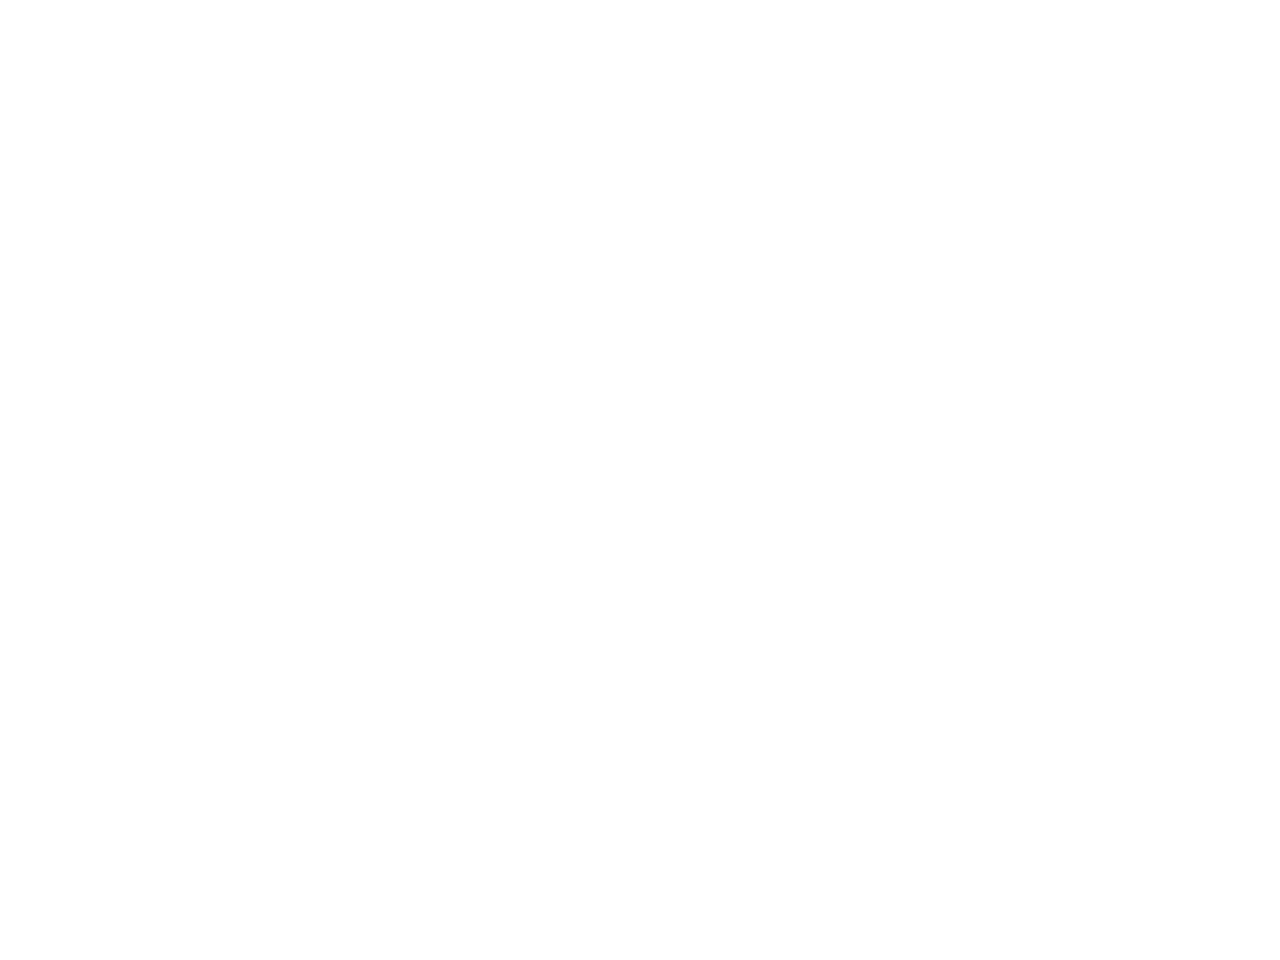

<IPython.core.display.Javascript object>


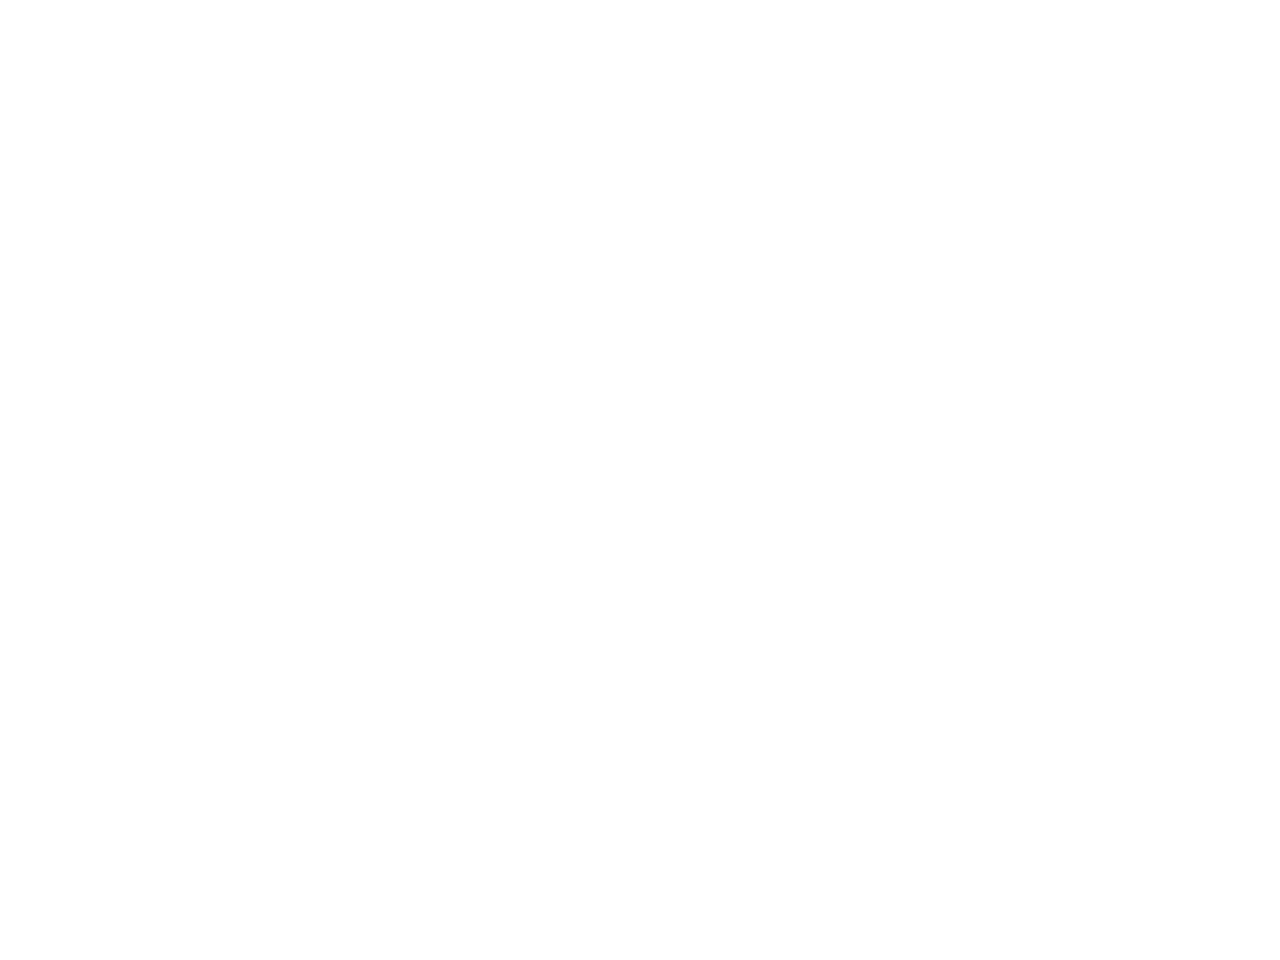

<IPython.core.display.Javascript object>


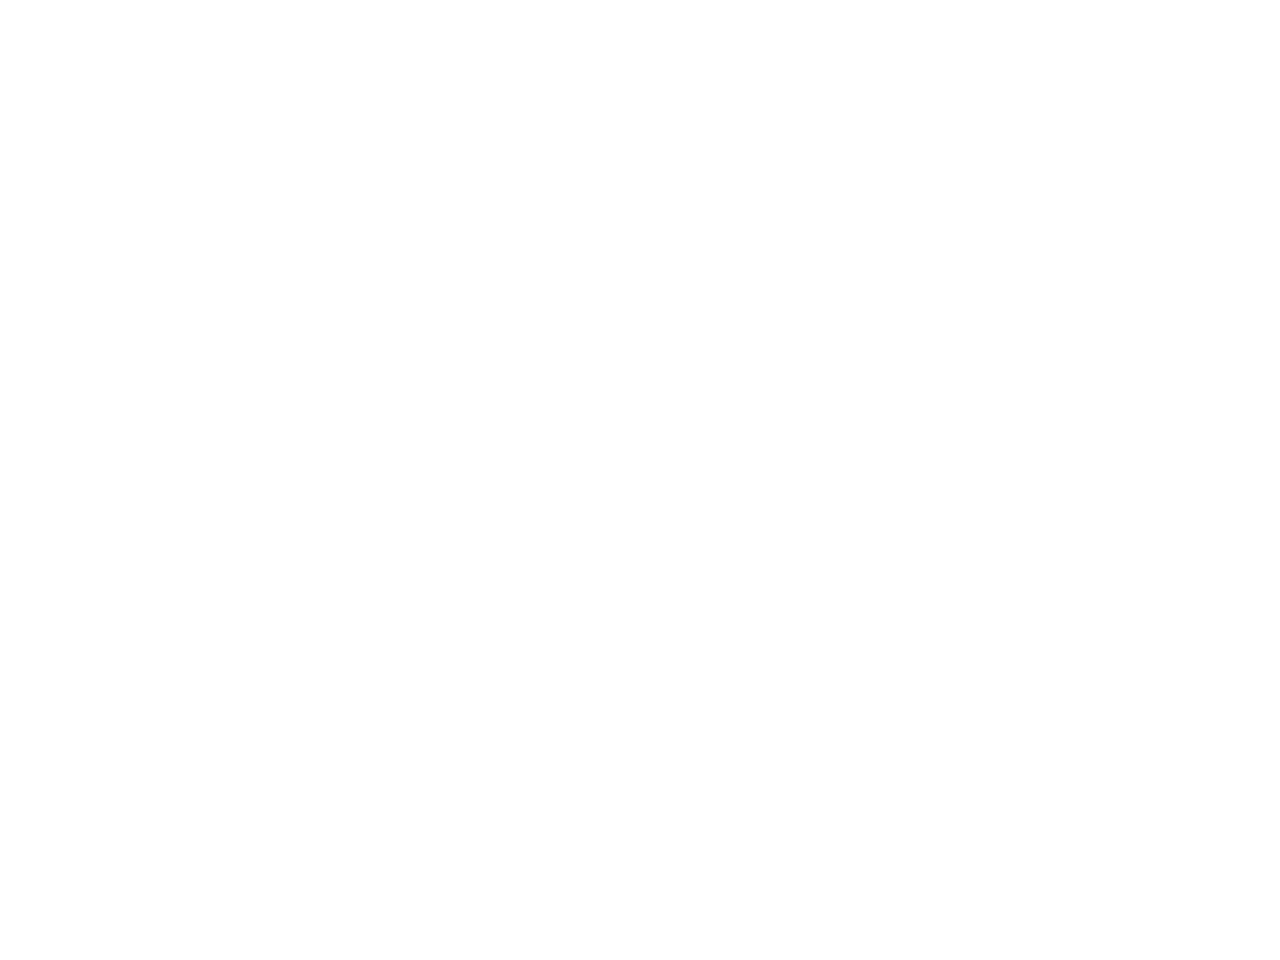

<IPython.core.display.Javascript object>


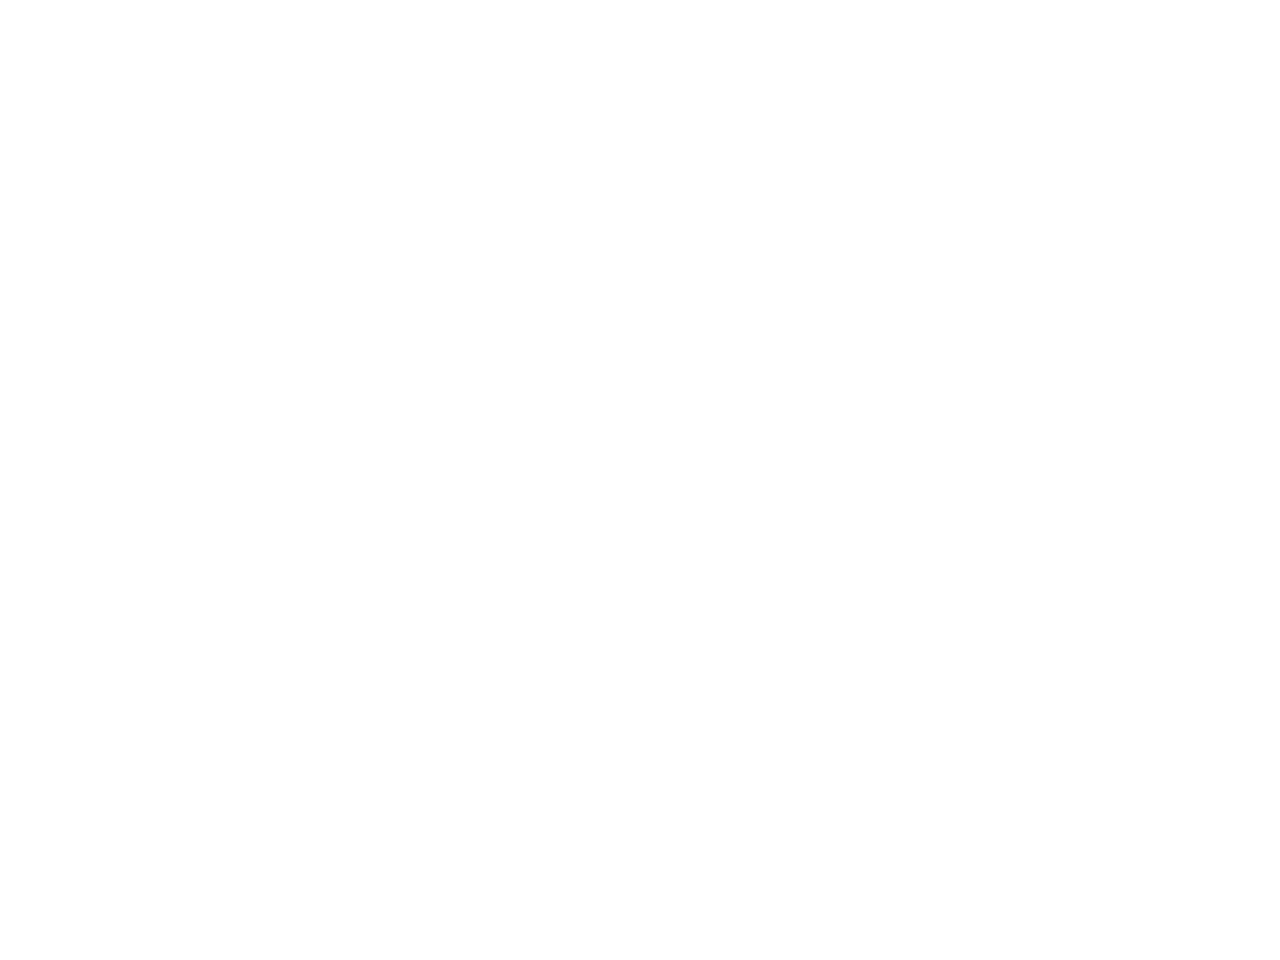

<IPython.core.display.Javascript object>


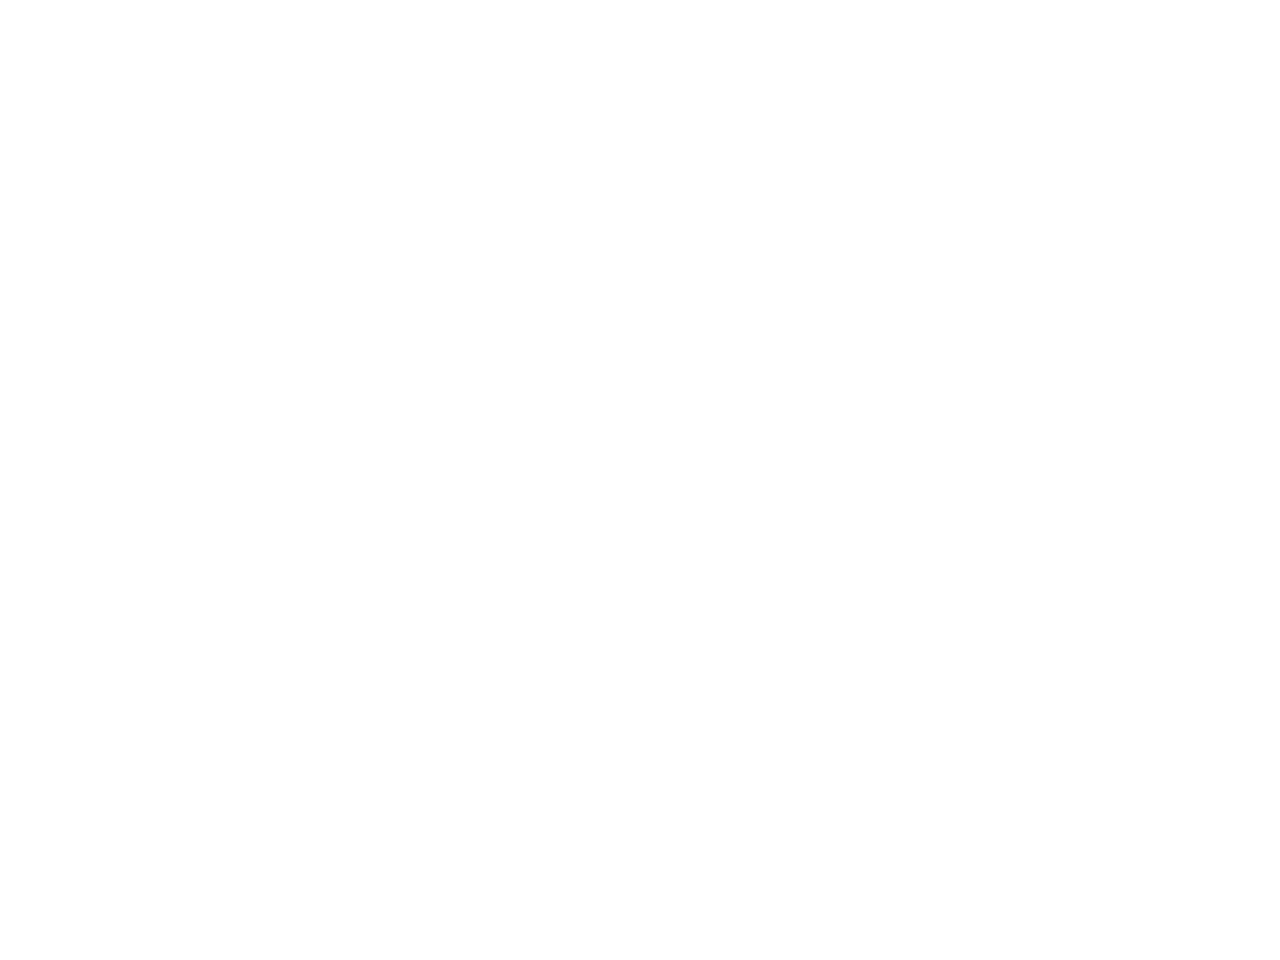

<IPython.core.display.Javascript object>


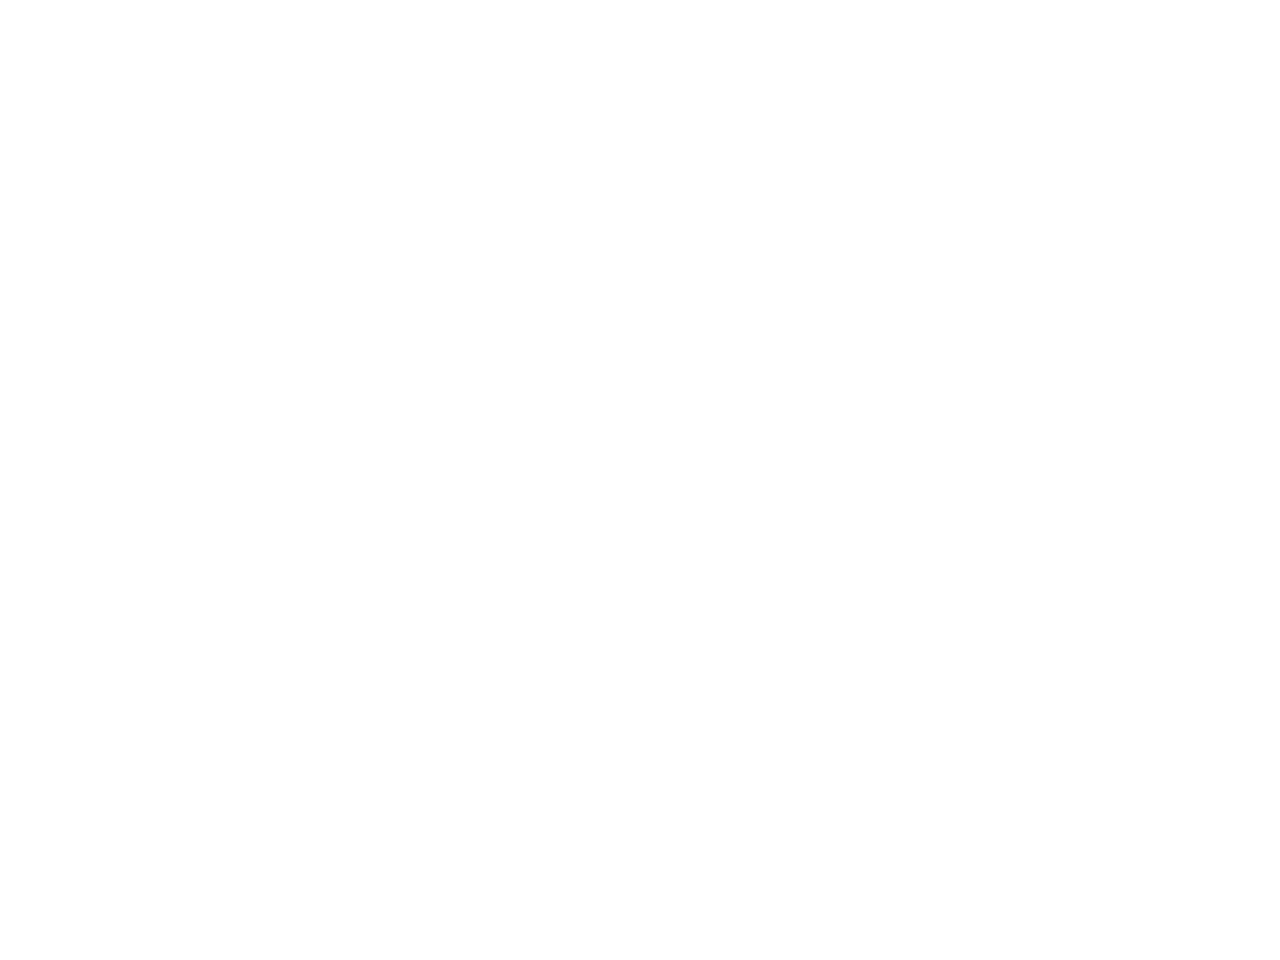

NameError: name 'x' is not defined

In [37]:
#Chapter 9 - Plotting and Visualization 

# interactive plot-ting in the Jupyter Notebook 
%matplotlib notebook 
import matplotlib.pyplot as plt 
import numpy as np 
data = np.arange(10)
plt.plot(data)

# Figures and Subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
# 'k--' style option 
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

# shrink the spacing all the way to zero 
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

# Colors, Markers, and Line Style 
from numpy.random import randn 
fig = plt.figure()
#plt.plot(randn(30).cumsum(), color = 'k', linestyle='dashed', marker='o')
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30, fontsize='small')
props = {
    'title': 'My first matplotlib plot',
    'xlabel':'Stages'
}
ax.set(**props)

# Adding legends 
from numpy.random import randn 
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

# You can add annotations and text using the text, arrow, and annotate functions 
ax.text(x,y,'Hello world!', family='monospace', fontsize=10)

from datetime import datetime 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('data/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for data, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwisth=4, width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010 
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')


    

<IPython.core.display.Javascript object>


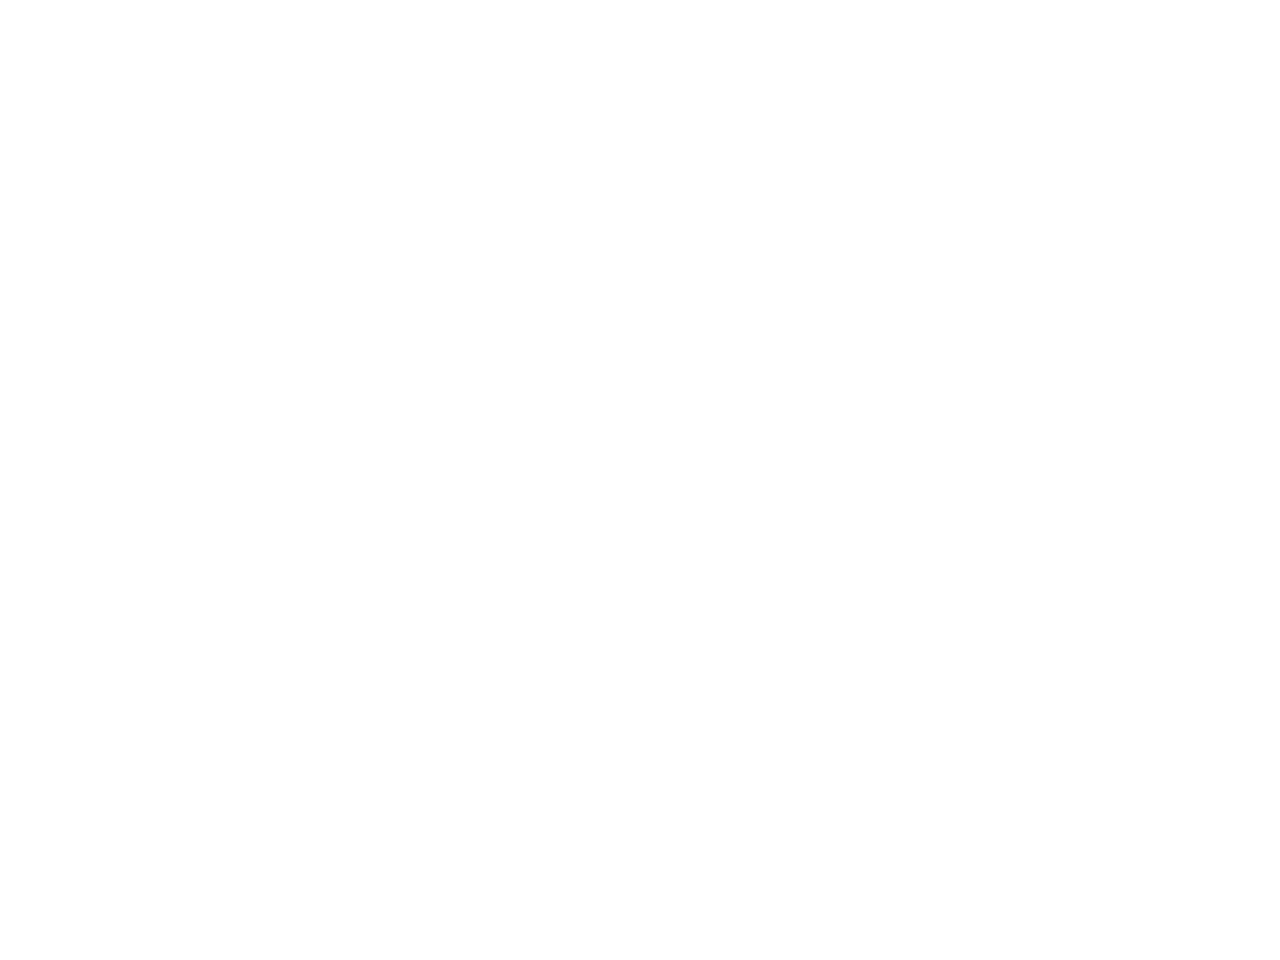

NameError: name '_converter' is not defined

In [42]:
%matplotlib notebook 
import matplotlib.pyplot as plt 
import numpy as np 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color = 'g',
                  alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# save the active figure to file using plt.savefig 
plt.savefig('data/figpatch.svg')
# dpi, dots-per-inch resolution 
# bbox_inches, which can trim the whitespace around 
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()


<IPython.core.display.Javascript object>


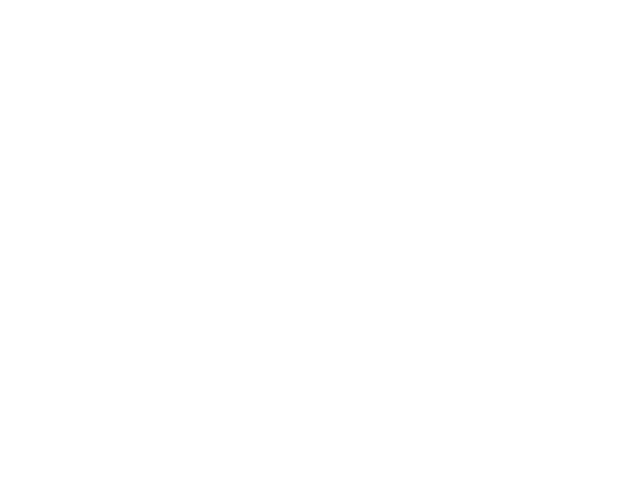

<IPython.core.display.Javascript object>


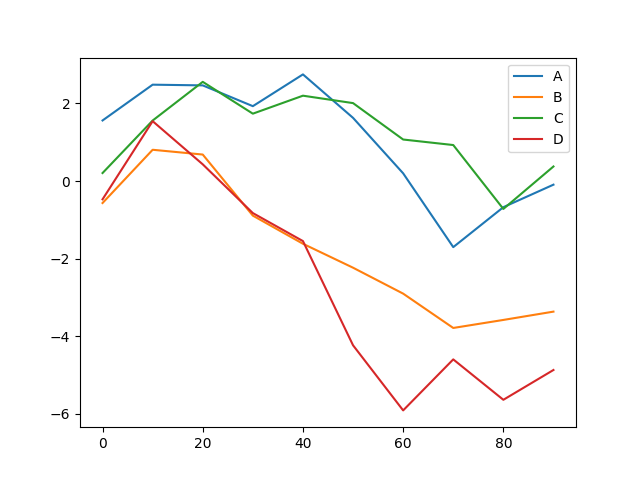

In [3]:
%matplotlib notebook 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

fig = plt.figure()


# Plotting with pandas and seaborn 
# seaborn, a statistical graphics library 
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A','B','C','D'],
                 index=np.arange(0,100,10))
df.plot()

<IPython.core.display.Javascript object>


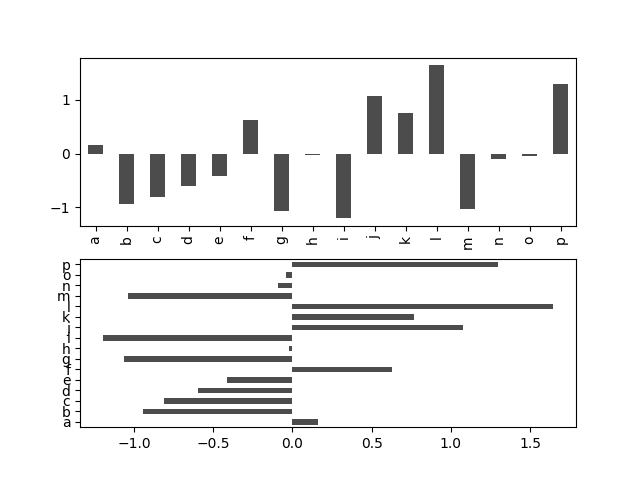

In [4]:
%matplotlib notebook 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

# plot.bar() and plot.barh() make vertical and horizontal bar plots 
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)


<IPython.core.display.Javascript object>


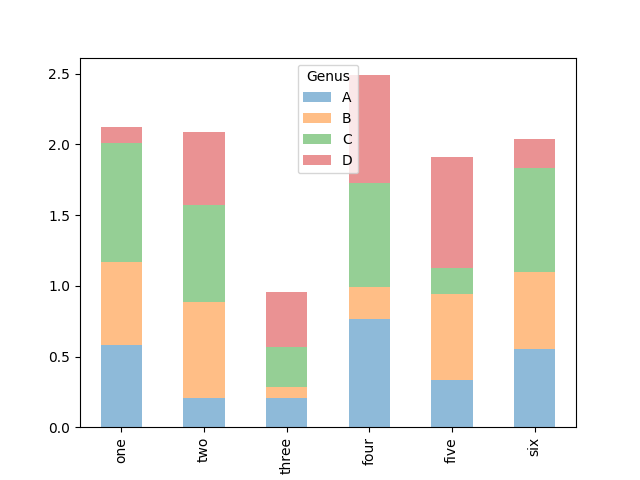

<IPython.core.display.Javascript object>


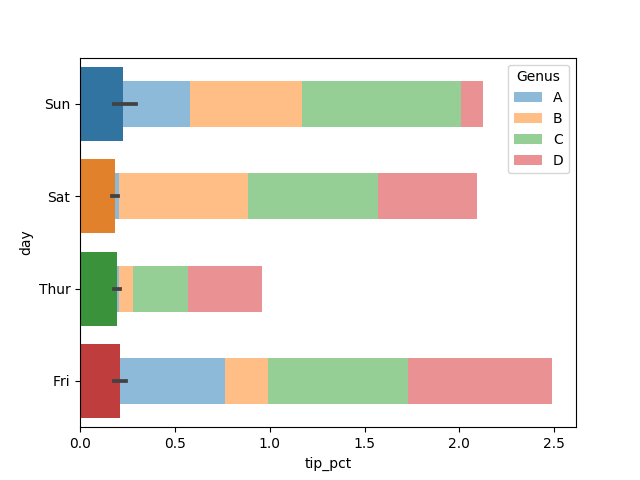

In [14]:
%matplotlib notebook 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

df = pd.DataFrame(np.random.rand(6, 4),
                 index=['one','two','three','four','five','six'],
                 columns=pd.Index(['A','B','C','D'], name='Genus'))
df.plot.bar(stacked=True, alpha=0.5)

df.plot.barh(stacked=True, alpha=0.5)

import seaborn as sns  # requires aggregation or summarization 

tips = pd.read_csv('data/tips.csv')

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')



<IPython.core.display.Javascript object>


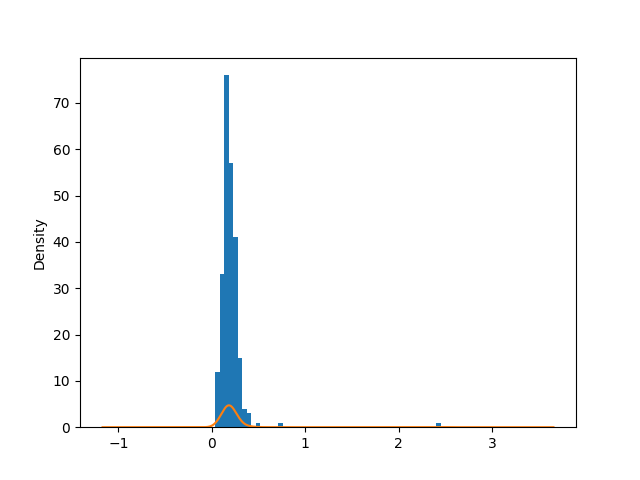

<IPython.core.display.Javascript object>


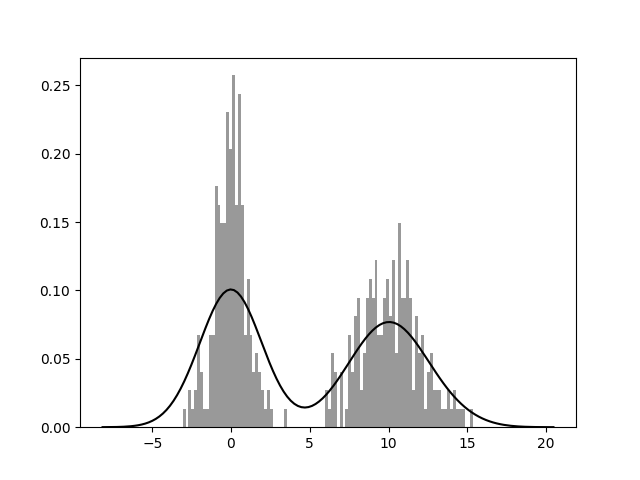

In [23]:
%matplotlib notebook 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns  # requires aggregation or summarization 


# Histograms and Density Plots 
tips = pd.read_csv('data/tips.csv')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['tip_pct'].plot.hist(bins=50)
tips['tip_pct'].plot.density()

fig = plt.figure()
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')


<IPython.core.display.Javascript object>


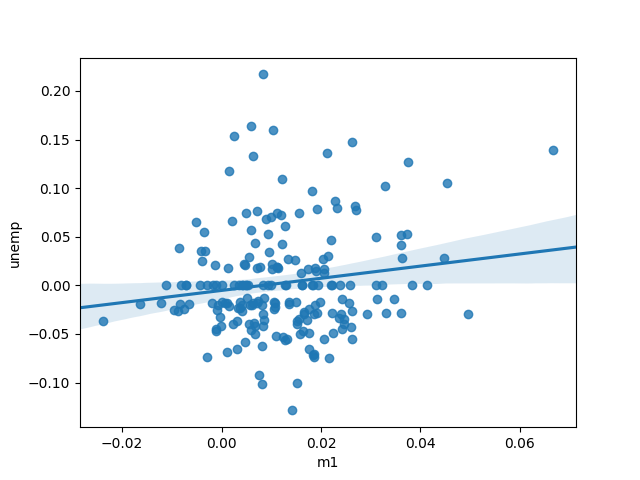

In [30]:
%matplotlib notebook 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns  # requires aggregation or summarization 

macro = pd.read_csv('data/macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]
# regplot method which makes a scatter plot and fits a linear regression line 
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Change in log %s versus log %s' %('m1', 'unemp'))


In [55]:
#Chapter 10 - Data Aggregation and Group Operations 
# GroupBy Mechanics 
%matplotlib notebook 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns  # requires aggregation or summarization 

df = pd.DataFrame({'key1':['a','a','b','b','a'],
                  'key2':['one','two','one','two','one'],
                  'data1': np.random.randn(5),
                  'data2': np.random.randn(5)})
grouped = df['data1'].groupby(df['key1'])
grouped.mean() # GroupBy object 
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means.unstack()

states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()
df.groupby('key1').mean()
df.groupby(['key1','key2']).mean()
df.groupby(['key1', 'key2']).size()

for name, group in df.groupby('key1'):
    print(name)
    print(group)

for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)
    
pieces = dict(list(df.groupby('key1')))
pieces['b']

df.dtypes
grouped = df.groupby(df.dtypes, axis=1)
for dtype, group in grouped:
    print(dtype)
    print(group)

# Selecting a Column or Subset of Columns 
df.groupby(['key1', 'key2'])[['data2']].mean()



a
      data1     data2 key1 key2
0 -1.837887  0.412487    a  one
1 -0.386037  1.462196    a  two
4  0.166854  1.705002    a  one
b
      data1     data2 key1 key2
2 -1.498806 -1.459402    b  one
3 -0.074673  1.272853    b  two
('a', 'one')
      data1     data2 key1 key2
0 -1.837887  0.412487    a  one
4  0.166854  1.705002    a  one
('a', 'two')
      data1     data2 key1 key2
1 -0.386037  1.462196    a  two
('b', 'one')
      data1     data2 key1 key2
2 -1.498806 -1.459402    b  one
('b', 'two')
      data1     data2 key1 key2
3 -0.074673  1.272853    b  two
float64
      data1     data2
0 -1.837887  0.412487
1 -0.386037  1.462196
2 -1.498806 -1.459402
3 -0.074673  1.272853
4  0.166854  1.705002
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


data2
key1 key2          
a    one   1.058744
     two   1.462196
b    one  -1.459402
     two   1.272853

In [78]:
%matplotlib notebook 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns  # requires aggregation or summarization 

people = pd.DataFrame(np.random.randn(5,5),
                     columns=['a','b','c','d','e'],
                     index=['Joe','Steve','Wes','Jim','Travis'])
people.iloc[2:3, [1,2]] = np.nan # Add a few NA values 
mapping = {'a':'red', 'b':'red', 'c':'blue',
          'd':'blue', 'e':'red', 'f':'orange'}
by_column = people.groupby(mapping, axis=1)
by_column.sum()

map_series = pd.Series(mapping)
people.groupby(map_series, axis=1).count()

people.groupby(len).sum()
key_list = ['one','one','one','two','two']
people.groupby([len, key_list]).min()

columns = pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],
                                    [1,3,5,1,3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4,5), columns=columns)

grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

def peak_to_peak(arr):
    return arr.max() - arr.min()

grouped.agg(peak_to_peak)
grouped.describe()

tips = pd.read_csv('data/tips.csv')

# Add tip percentage of total bill 
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips[:6]
grouped = tips.groupby(['day', 'smoker'])
grouped_pct = grouped['tip_pct']
grouped_pct.agg(['mean','std', peak_to_peak])
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

functions = ['count','mean','max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result['tip_pct']

ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped.agg({'tip':np.max, 'size': 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [93]:
%matplotlib notebook 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns  # requires aggregation or summarization 

tips = pd.read_csv('data/tips.csv')

# Add tip percentage of total bill 
tips['tip_pct'] = tips['tip']/tips['total_bill']

def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

top(tips, n=6)
tips.groupby('smoker').apply(top)
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')
tips.groupby('smoker')['tip_pct'].describe()
result.unstack('smoker')

s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s.fillna(s.mean())

states = ['Ohio', 'New York', 'Vermont', 'Florida', 'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4 
data = pd.Series(np.random.randn(8), index=states)
data[['Vermont','Nevada','Idaho']] = np.nan
data.groupby(group_key).mean()



East    0.425724
West    1.419392
dtype: float64

In [3]:
#Chapter 11 - Time Series 
from datetime import datetime 
from datetime import timedelta
import pandas as pd 
import numpy as np 

now = datetime.now() 
# timedelta difference between two datetime objects 
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15) 
start = datetime(2011, 1, 7)
start + timedelta(12)
start - 2 * timedelta(12)

# Converting Between String and Datetime 
stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime('%Y-%m-%d')
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d') # parse str to date 

from dateutil.parser import parse 
parse('2018-02-26')
parse('6/12/2011', dayfirst=True)

datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)
idx = pd.to_datetime(datestrs + [None])
pd.isnull(idx)

# Time Series Basics 
from datetime import datetime 

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts + ts[::2]
ts.index.dtype
stamp = ts.index[0]
stamp = ts.index[2]
ts[stamp]
ts['1/10/2011']

longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
longer_ts['2001-05']
ts[datetime(2011,1,7):]
ts['1/6/2011':'1/11/2011']
ts.truncate(after='1/9/2011')
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                      index=dates,
                      columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['5-2001']

# Time Series with Duplicate Indices 
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts.index.is_unique # checking its is_unique property 

grouped = dup_ts.groupby(level=0)
grouped.mean() 
grouped.count()

# Date Ranges, Frequencies, and Shifting 
# You can convert the sample time series to be fixed daily frequency by calling resample 
resample = ts.resample('D')
resample

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [37]:
# Generating Date Range 
import pandas as pd 
import numpy as np 

index = pd.date_range('2012-04-01', '2012-06-01')
pd.date_range(start='2012-04-01', periods=20)
pd.date_range(end='2012-06-01', periods=20)
# BM -- date index containing the last business day of each month 
pd.date_range('2018-01-01', '2018-03-01', freq='BM')
pd.date_range('2018-01-01 00:00:01', periods=5)

from pandas.tseries.offsets import Hour, Minute, Day, MonthEnd

hour = Hour()
four_hours = Hour(4)
four_hours
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')
Hour(2)+Minute(30)
pd.date_range('2000-01-01', periods=10, freq='1h30min')

# WOM -- week of month 
pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

# Shifting -- refers to moveing data backward and forward through time 
ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))
# When we shift like this, missing data is introduced either at the start or the end of the time series 
ts.shift(2)
ts.shift(-2)
ts.shift(2, freq='M')
ts.shift(3, freq='D')
ts.shift(1, freq='90T') # T here standas for minutes 

now = datetime(2018,2,28)
now + 3 * Day()
now + MonthEnd(2)

offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts.groupby(offset.rollforward).mean()
ts.resample('M').mean()

2000-01-31   -0.217710
2000-02-29    0.337638
2000-03-31   -0.174233
Freq: M, dtype: float64

In [63]:
# Time Zone Handling 
# UTC -- coordinated universal time -- international standard 
# pytz -- time zone information comes from 
import pytz 

pytz.common_timezones[-5:]
pytz.timezone('Asia/Shanghai')

rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
pd.date_range('3/9/2012', periods=10, freq='D', tz='UTC')

# Conversion from naive to localized is handled by the tz_localize 
ts_utc = ts.tz_localize('UTC')
# Once a time series has been localized to a particular time zone, it can be converted to another time zone with tz_convert
ts_utc.tz_convert('America/New_York')

stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

# Periods and Period Arithmetic 
p = pd.Period(2007, freq='A-DEC')
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
pd.Series(np.random.randn(6), index=rng)

p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')
p.asfreq('M', how='end')

Period('2007-12', 'M')

<IPython.core.display.Javascript object>


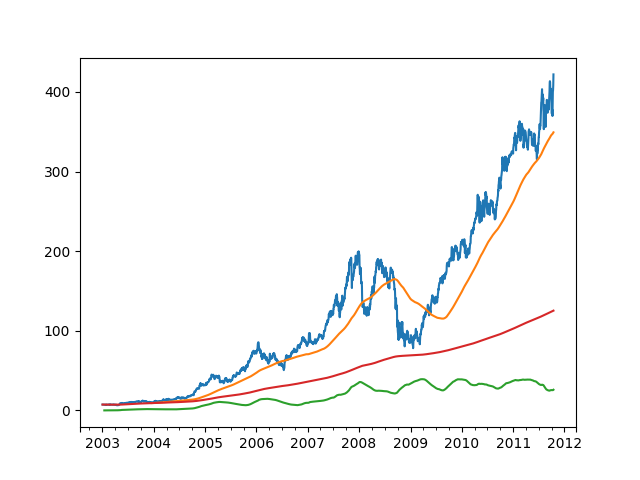

<IPython.core.display.Javascript object>


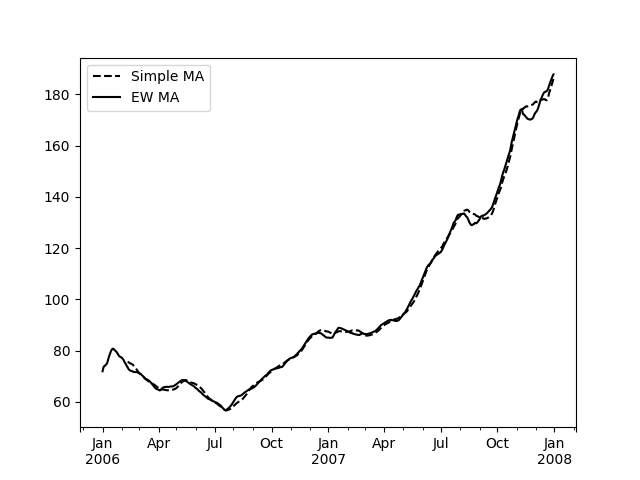

<IPython.core.display.Javascript object>


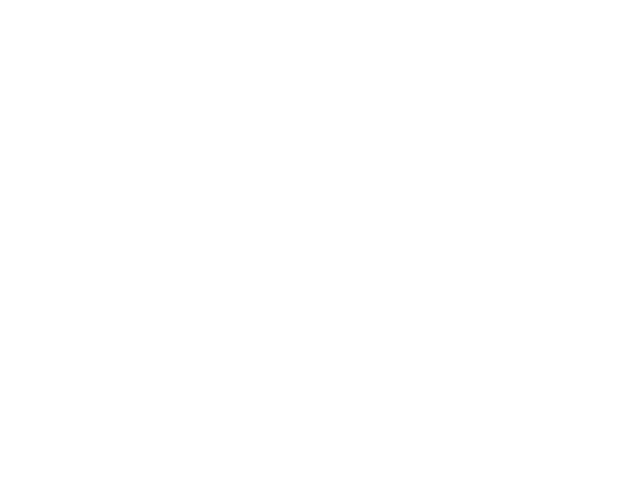

<IPython.core.display.Javascript object>


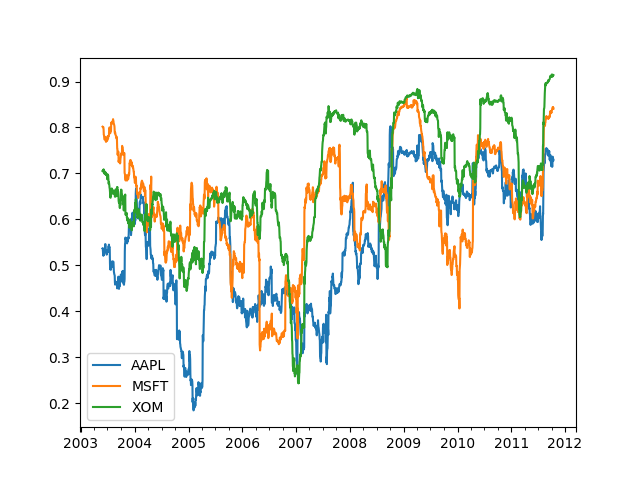

<IPython.core.display.Javascript object>


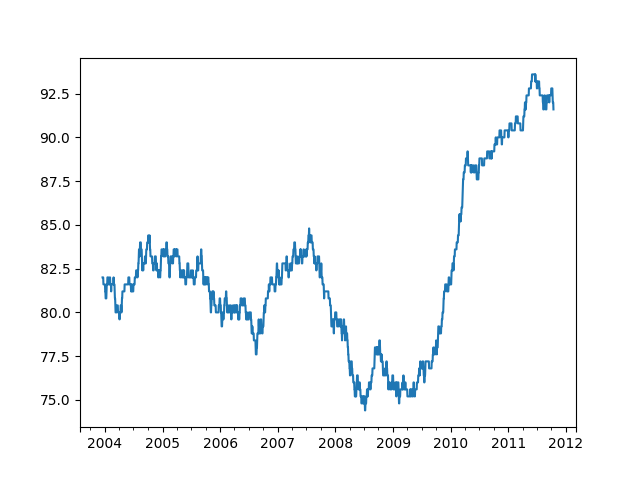

In [85]:
%matplotlib notebook 
import matplotlib.pyplot as plt
# Moving Window Functions 
import pandas as pd 
import numpy as np 

close_px_all = pd.read_csv('data/stock_px_2.csv',
                          parse_dates=True,
                          index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
# B -- busness day 
close_px = close_px.resample('B').ffill()
# rolling operator 
close_px.AAPL.plot()
# It create an object that enables grouping over a 250-day sliding window
close_px.AAPL.rolling(250).mean().plot()
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()
close_px.AAPL.expanding().mean().plot()
close_px.rolling('20D').mean()

# Exponentially Weighted Functions 
# Since an exponentially weighted statistic places more weight on more recent observation, it "adapts" faster to changes compared with the equal-weighted version 
fig = plt.figure()
appl_px = close_px.AAPL['2006':'2007']
ma60 = appl_px.rolling(30).mean()
# Provides exponential weighted functions 提供指数加权函数
ewma60 =appl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

# Binary Moving Window Functions
# As an example, financial analysts are often interested in a stock's correlation to a benchmark index like the S&P 500.

fig = plt.figure()
spx_px = close_px_all['SPX']
# Percent change over given number of periods
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
returns.rolling(125, min_periods=100).corr(spx_rets).plot()

# User-Defined Moving Window Functions 
from scipy.stats import percentileofscore 
fig = plt.figure()
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [92]:
#Chapter 12 Advanced pandas 
# better performance and memory use in some pandas operations by using it
import numpy as np
import pandas as pd 

values = pd.Series(['apple','orange','apple','apple'] * 2)
pd.unique(values)
pd.value_counts(values)

values = pd.Series([0, 1, 0, 0] * 2)
dim = pd.Series(['apple', 'orange'])
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

In [98]:
#Chapter 13 Introduction to Modeling Libraries in Python
# A common workflow for model development is to use pandas for data loading and cleaning before switching over to a modeling library to build the model itself
import pandas as pd 
import numpy as np 

data = pd.DataFrame({
    'x0': [1,2,3,4,5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.],
    'y' : [-1.5, 0., 3.6, 1.3, -2.]
})
data.values # to Turn a DataFrame into a Numpy array, use the .values property 
df2 = pd.DataFrame(data.values, columns=['one', 'two', 'three'])
df3 = data.copy()
df3['strings'] = ['a', 'b', 'c', 'd', 'e']
df3.values

array([[1, 0.01, -1.5, 'a'],
       [2, -0.01, 0.0, 'b'],
       [3, 0.25, 3.6, 'c'],
       [4, -4.1, 1.3, 'd'],
       [5, 0.0, -2.0, 'e']], dtype=object)

In [127]:
# Introduction to scikit-learn 
# Scikit-learn is onr of the most widely used and trusted general-purpose Python machine leanring toolkits 
import pandas as pd 
import numpy as np 

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.isnull().sum() # see if there are any that contain missing data 
test.isnull().sum() # 

impute_value = train['age'].median()
train['age'] = train['age'].fillna(impute_value)
test['age'] = test['age'].fillna(impute_value)

train.columns
# encoded version of the 'sex' column 
train['IsFemale'] = (train['sex'] == 'female').astype(int)
test['IsFemale'] = (test['sex'] == 'female').astype(int)

predictors = ['pclass', 'IsFemale', 'age']
X_train = train[predictors].values
X_test = test[predictors].values 
y_train = train['survived'].values 

X_train[:5]
y_train[:5]

# LogisticRegression model 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
from sklearn.model_selection import cross_val_score 

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# Cross-validation works by spliting the training data to simulate out-of-sample prediction.
model_cv = LogisticRegressionCV(10)
model_cv.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=2)
scores

array([0.79147982, 0.77303371])

In [ ]:
#Chapter 14 - Data Analysis Examples 
